In [1]:
from BinanceTrade import *
import StrategyBackTest
import matplotlib.pyplot as plt

In [11]:
# 코인 설정
ticker = "DOGEUSDT"
interval = "15m"
start_date = "2022-07-01"
end_date = "2023-01-01"
df=get_all_ohlcv(
    symbol=ticker, 
    interval=interval, 
    start_date=datetime.datetime.strptime(start_date, "%Y-%m-%d"), 
    end_date=datetime.datetime.strptime(end_date, "%Y-%m-%d"),
    )

# 전략 설정
length=14
change_percentage=1.4
below=55
above=100
strategy_df = strategy_vwma_long(
    df=df,
    length=length,
    change_percentage=change_percentage,
    below=below,
    above=above,
    )

print(f"{ticker} {interval} \n{start_date} ~ {end_date}")

DOGEUSDT 15m 
2022-07-01 ~ 2023-01-01


In [12]:
# 백테스트 시작
start_balance =10000.0 # 시작 자산
fee = 0.0005    # 수수료
dca = -0.02  # 분할매수 진입 최소 수익률 
dca_levels = [0.3,0.5,1.0]      # 분할매수 비율
mtp = -1    # Min Take Profit 매도시 최소 수익률 (미사용 시 -1)
stl = -1    # Stop Loss (미사용 시 -1)
backtest_df = StrategyBackTest.DCABackTest(
    data=strategy_df,
    start_balance=start_balance,
    fee=fee,
    dca=dca,
    dca_levels=dca_levels,
    mtp=mtp,
    stl=stl,
    )

매수 횟수: 288번
매도 횟수: 172번
매매 최고 수익률: 11.264%
매매 평균 수익률: 1.558%
MDD: -13.787%
최저 수익률: -9.711%
최고 수익률: 92.628%
최종 수익률: 66.554%


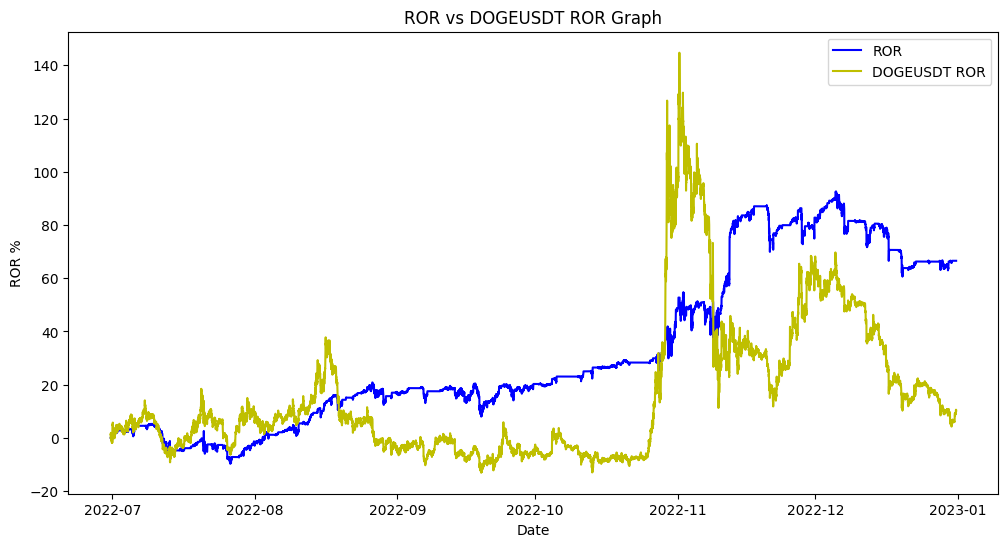

In [13]:
# 수익률 비교
backtest_df[f'{ticker} ROR'] = (backtest_df['Close'] / backtest_df['Close'].iloc[0] - 1) * 100
plt.figure(figsize=(12, 6))
plt.plot(backtest_df['Time'], backtest_df['총수익률'], label='ROR', color='b', linestyle='-')
plt.plot(backtest_df['Time'], backtest_df[f'{ticker} ROR'], label=f'{ticker} ROR', color='y', linestyle='-')
plt.plot()
plt.title(f'ROR vs {ticker} ROR Graph')
plt.xlabel('Date')
plt.ylabel('ROR %')
plt.legend()
plt.show()

In [ ]:
# 엑셀로 출력
strategy_name = "VWMA_LONG"
now = datetime.datetime.now()
backtest_df.to_excel(f"backtest/[{strategy_name}]BackTest_{ticker}{interval}.xlsx")